In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
from config import weather_api_key
import time
from datetime import datetime

In [6]:
#starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


645

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.????replace
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | miri
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | rozvadiv
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | krasnoselkup
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | burnie
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | guilin
Processing Record 22 of Set 1 | prince rupert
Processin

Processing Record 36 of Set 4 | fort saint john
City not found. Skipping...
Processing Record 37 of Set 4 | linguere
Processing Record 38 of Set 4 | manuk mangkaw
Processing Record 39 of Set 4 | san lorenzo
Processing Record 40 of Set 4 | lewiston
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | madimba
Processing Record 46 of Set 4 | ninghai
Processing Record 47 of Set 4 | kokopo
Processing Record 48 of Set 4 | acuna
City not found. Skipping...
Processing Record 49 of Set 4 | tsiroanomandidy
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | cruzeiro do sul
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | oussouye
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | dubuque
Processing Record 7 of Set 5 | saleau

Processing Record 26 of Set 8 | sorland
Processing Record 27 of Set 8 | guerrero
Processing Record 28 of Set 8 | kavieng
Processing Record 29 of Set 8 | psebay
Processing Record 30 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 31 of Set 8 | havre-saint-pierre
Processing Record 32 of Set 8 | young
Processing Record 33 of Set 8 | koroni
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | phatthalung
Processing Record 36 of Set 8 | lemesos
City not found. Skipping...
Processing Record 37 of Set 8 | tynda
Processing Record 38 of Set 8 | kaeo
Processing Record 39 of Set 8 | manvi
Processing Record 40 of Set 8 | hammerfest
Processing Record 41 of Set 8 | bose
Processing Record 42 of Set 8 | apozol
Processing Record 43 of Set 8 | muroto
Processing Record 44 of Set 8 | turka
Processing Record 45 of Set 8 | magadan
Processing Record 46 of Set 8 | broome
Processing Record 47 of Set 8 | coruripe
Processing Record 48 of Set 8 | pyapon
Processing Record 49 o

Processing Record 13 of Set 12 | kismayo
Processing Record 14 of Set 12 | de-kastri
Processing Record 15 of Set 12 | grand gaube
Processing Record 16 of Set 12 | marienburg
Processing Record 17 of Set 12 | gbadolite
Processing Record 18 of Set 12 | kununurra
Processing Record 19 of Set 12 | ternate
Processing Record 20 of Set 12 | kochubey
Processing Record 21 of Set 12 | xining
Processing Record 22 of Set 12 | corinth
Processing Record 23 of Set 12 | lerwick
Processing Record 24 of Set 12 | laje
Processing Record 25 of Set 12 | goure
Processing Record 26 of Set 12 | al
City not found. Skipping...
Processing Record 27 of Set 12 | yichang
Processing Record 28 of Set 12 | whyalla
Processing Record 29 of Set 12 | kimbe
Processing Record 30 of Set 12 | luganville
Processing Record 31 of Set 12 | aras
Processing Record 32 of Set 12 | mandan
Processing Record 33 of Set 12 | bemidji
Processing Record 34 of Set 12 | vardo
Processing Record 35 of Set 12 | pirot
Processing Record 36 of Set 12 | 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,68.34,83,69,3.00,ZA,2022-02-02 04:07:05
1,Bluff,-46.6000,168.3333,70.81,92,92,7.45,NZ,2022-02-02 04:07:06
2,Tuktoyaktuk,69.4541,-133.0374,-27.72,100,100,4.65,CA,2022-02-02 04:07:06
3,Nikolskoye,59.7035,30.7861,24.69,98,99,2.26,RU,2022-02-02 04:02:32
4,Miri,4.4148,114.0089,85.30,70,97,4.50,MY,2022-02-02 04:07:07
5,Longyearbyen,78.2186,15.6401,19.24,79,75,8.05,SJ,2022-02-02 04:03:53
6,Rozvadiv,49.5000,23.6167,32.72,72,100,19.48,UA,2022-02-02 04:07:07
7,Severo-Kurilsk,50.6789,156.1250,31.26,74,100,9.53,RU,2022-02-02 04:07:07
8,Dunedin,-45.8742,170.5036,79.92,52,70,12.37,NZ,2022-02-02 04:07:08
9,Busselton,-33.6500,115.3333,82.04,33,37,11.01,AU,2022-02-02 04:07:08


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-02-02 04:07:05,-33.9258,18.4232,68.34,83,69,3.00
1,Bluff,NZ,2022-02-02 04:07:06,-46.6000,168.3333,70.81,92,92,7.45
2,Tuktoyaktuk,CA,2022-02-02 04:07:06,69.4541,-133.0374,-27.72,100,100,4.65
3,Nikolskoye,RU,2022-02-02 04:02:32,59.7035,30.7861,24.69,98,99,2.26
4,Miri,MY,2022-02-02 04:07:07,4.4148,114.0089,85.30,70,97,4.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

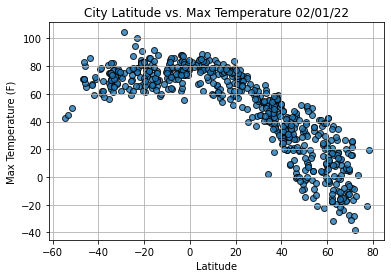

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

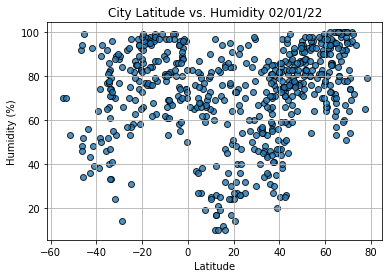

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

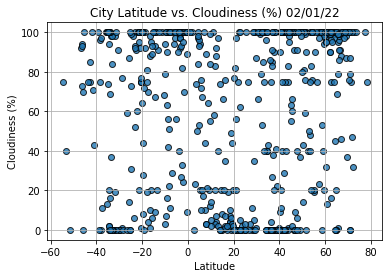

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

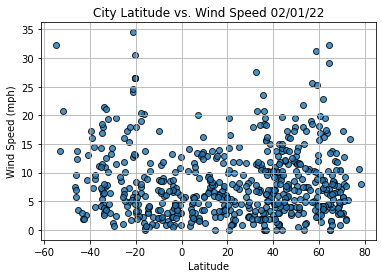

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Iqaluit
Country                        CA
Date          2022-02-02 04:07:09
Lat                       63.7506
Lng                      -68.5145
Max Temp                    -5.31
Humidity                       70
Cloudiness                    100
Wind Speed                   17.0
Name: 13, dtype: object

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


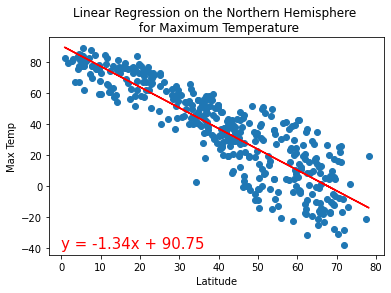

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (0,-40))

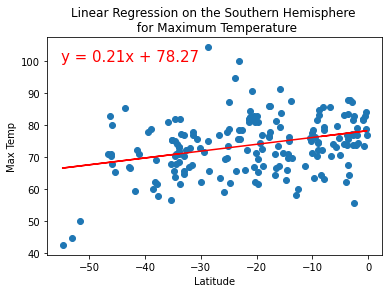

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (-55,100))

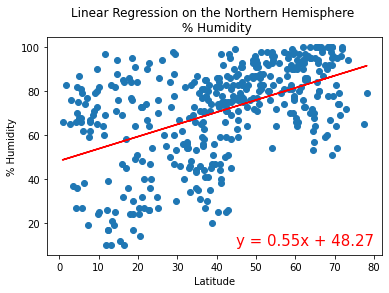

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n % Humidity',
                      '% Humidity',(45,10))

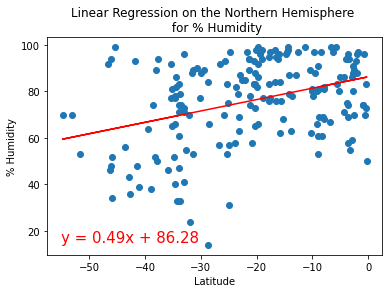

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(-55,15))


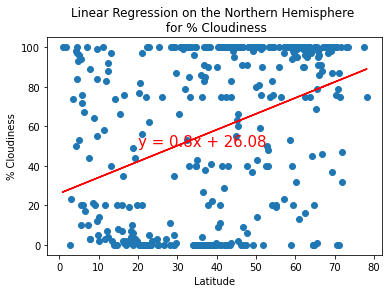

In [59]:
# Linear regression of cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',
                       (20,50))

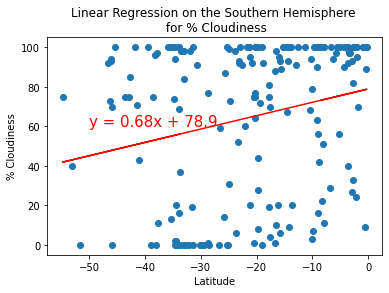

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

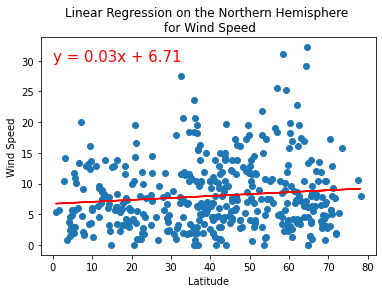

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(0,30))

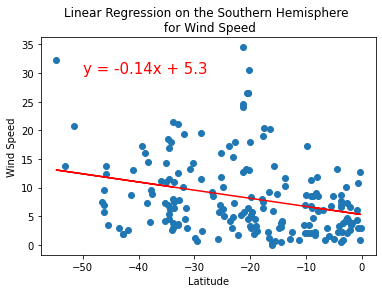

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,30))